**TASK 5**

**Step 1: Unzip the Dataset**

In [31]:
import zipfile

# Unzip the dataset
zip_path = '/content/creditcard.csv.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')

**Step 2: Load the Dataset**

In [ ]:
import pandas as pd

# Load the dataset
data_path = '/content/creditcard.csv'
data = pd.read_csv(data_path)

# Display dataset information
print("Dataset Sample:")
print(data.head())

Dataset Sample:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26     

In [ ]:
print("\nDataset Info:")
print(data.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64


**Step 3: Data Exploration**

**Check for Missing Values**

In [ ]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


**Explore the Class Distribution**


Class Distribution:
Class
0    284315
1       492
Name: count, dtype: int64


<ipython-input-14-d106144c38c6>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=data, palette='coolwarm')


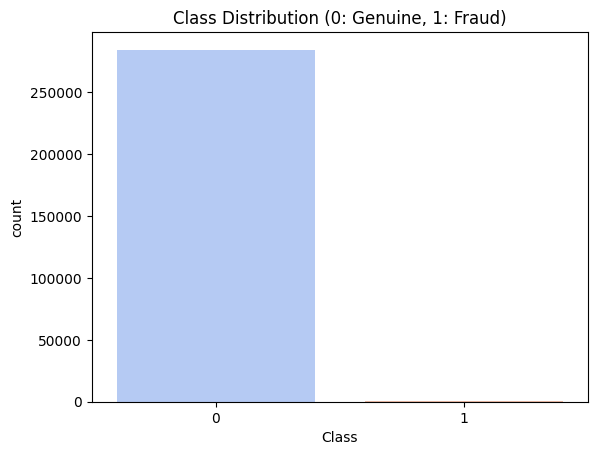

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

print("\nClass Distribution:")
print(data['Class'].value_counts())

sns.countplot(x='Class', data=data, palette='coolwarm')
plt.title('Class Distribution (0: Genuine, 1: Fraud)')
plt.show()

**Step 4: Preprocessing and Handling Class Imbalance**

**Separate Features and Target**

In [ ]:
X = data.drop(['Class'], axis=1)
y = data['Class']

**Balance the Dataset Using Oversampling (SMOTE)**

In [ ]:
pip install --upgrade scikit-learn imbalanced-learn

In [ ]:
# Import required libraries
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('/content/creditcard.csv.zip')

# Separate features and target
X = data.drop('Class', axis=1)  # Features
y = data['Class']               # Target

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to handle class imbalance
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

print("Data resampled and split successfully!")

Data resampled and split successfully!


**Step 5: Train a Classification Model**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data; transform the test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data scaled successfully!")

Data scaled successfully!


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data; transform the test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data scaled successfully!")

Data scaled successfully!


In [ ]:
# Train a Logistic Regression model with scaled data
logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train_scaled, y_train)

# Train a Random Forest model (does not require scaling)
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)  # Random Forest works with raw data

print("Models trained successfully!")

Models trained successfully!


In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data scaled successfully!")

Data scaled successfully!
